In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
naive_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex6/Matrix_Multiplication/mpi_mat_mul/output_naive"
mkl_path = "/home/cjkeerthana/Documents/Parallel_Programming/ParallelProgramming/Ex6/Matrix_Multiplication/mpi_mat_mul/output_mkl"
os.listdir(naive_path)
os.listdir(mkl_path)

['8192', '16384', '65536', 'exp1', '2048', '32768']

In [3]:
def read_all_times(dir_path):
    tot_time = []
    calc_time = []
    comm_time = []
    for file in os.listdir(dir_path):
    # Check whether file is in text format or not
        if file.endswith(".txt"):
            file_path = dir_path + "/" + file 
            name = file.split("_")
            with open(file_path, 'r') as f:
                new_line = 0
                for line in f.readlines():
                    t = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                    if t:
                        if (new_line==0):
                            tot_time.append((int(name[0]),float(t[0])))
                            new_line += 1
                        elif (new_line==1):
                            comm_time.append((int(name[0]),float(t[0])))
                            new_line += 1
                        else:
                            calc_time.append((int(name[0]),float(t[0])))  
                            new_line += 1
    tot_time.sort()
    calc_time.sort()
    comm_time.sort()
    procs = []
    t_tot = []
    t_calc = []
    t_comm = []
    
    for x in tot_time:
        a,b = x
        procs.append(a)
        t_tot.append(b)
    for x in calc_time:
        a,b = x
        t_calc.append(b)
    for x in comm_time:
        a,b = x
        t_comm.append(b)
        
    return procs, t_tot, t_calc, t_comm
           

In [4]:
def make_plots_times(title, labels, xtitle, commTime, calcTime):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x, commTime, width, bottom=calcTime, label='CommTime')
    rects2 = ax.bar(x, calcTime, width, label='CalcTime')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time')
    ax.set_xlabel(xtitle)
    ax.set_title(title ) 
    ax.set_xticks(x)
    ax.legend()
    ax.set_xticklabels(labels)

    fig.tight_layout()

    plt.show()

In [28]:
def scaling(title, nodes, totTime):
    speedup =totTime[0]/totTime
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(nodes, speedup)
    ax.set_ylabel('Speed Up')
    ax.set_xlabel('Nodes')
    ax.set_title(title)
    plt.show()

In [39]:
def efficiency(title, calcTime, procs, n):
    #theoretical_perf = no. of procs * freq * FLOPs/cycle
    #Architecture of Ulysses old nodes- Intel Xenon CPU E5-2680 v2 - Sandy Bridge - 8 FLOPs/cycle (DP)
    #Frequency - 2.8GHz
    theoretical_perf = procs * 2.8 * 8
    n_loc_avg = ((n/procs + 1) + n/procs)/2
    actual_flops_per_proc = 2*n_loc_avg*n_loc_avg*n*procs/10**9
    actual_perf = actual_flops_per_proc*procs/calcTime
    eff = actual_perf/theoretical_perf
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(procs, eff)
    ax.set_ylabel('Efficiency')
    ax.set_xlabel('Procs')
    ax.set_title(title)
    plt.show()

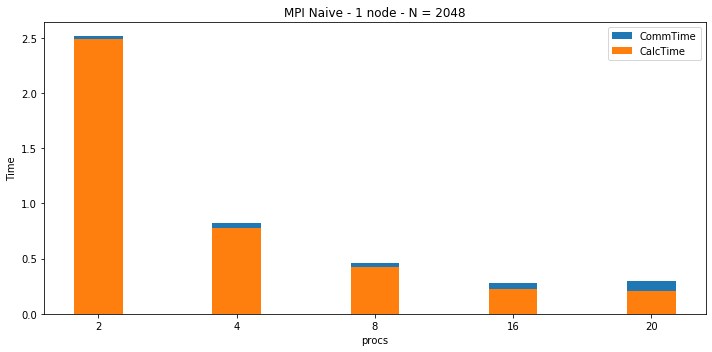

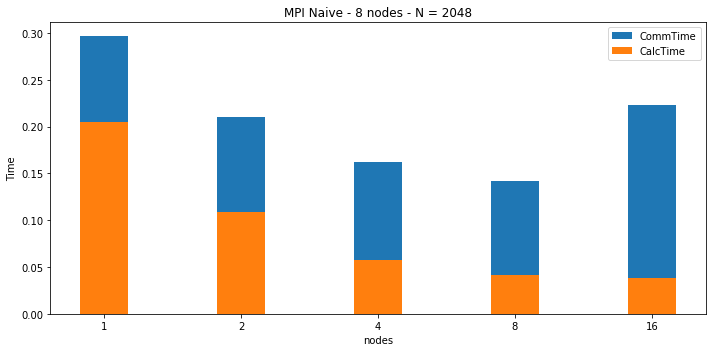

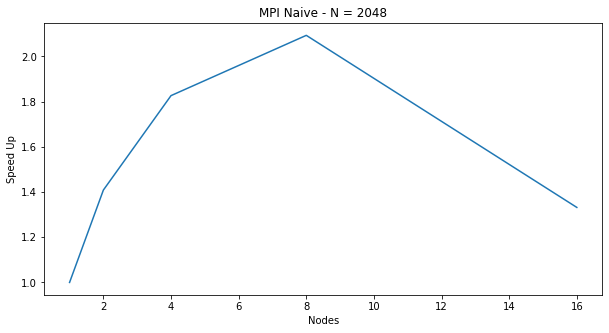

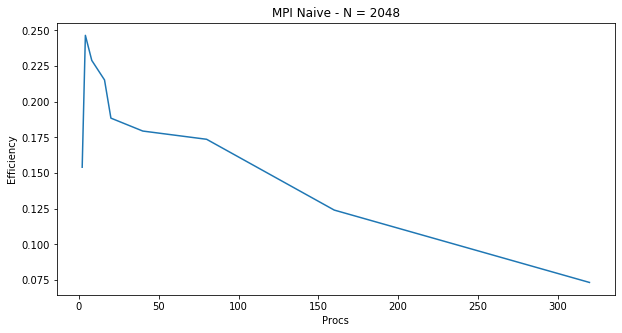

In [40]:
procs, tot_time, calc_time, comm_time = read_all_times(naive_path+"/2048")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI Naive - 1 node - N = 2048", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI Naive - 8 nodes - N = 2048", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI Naive - N = 2048", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI Naive - N = 2048", calc_time, np.asarray(procs), 2048)

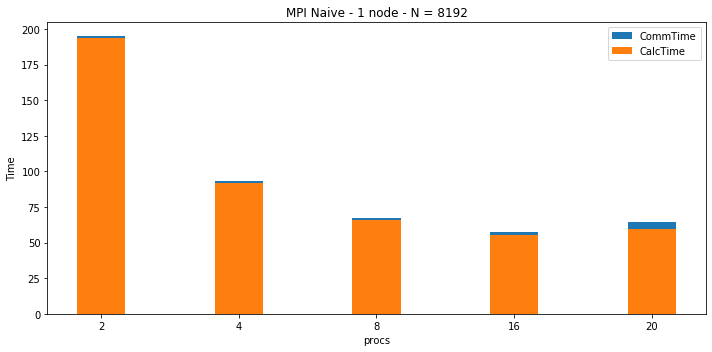

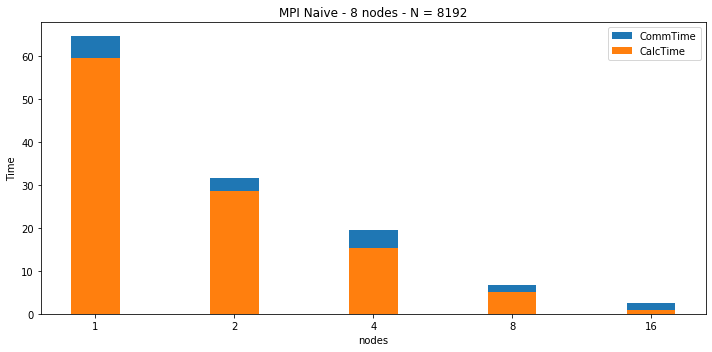

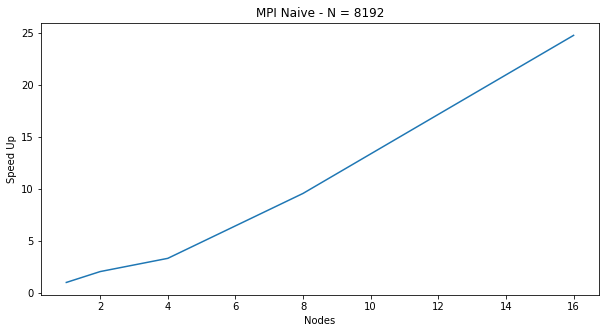

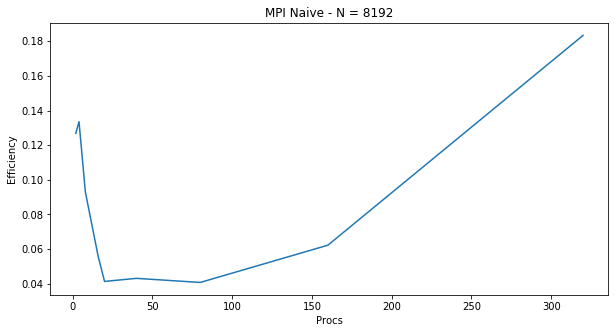

In [42]:
procs, tot_time, calc_time, comm_time = read_all_times(naive_path+"/8192")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI Naive - 1 node - N = 8192", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI Naive - 8 nodes - N = 8192", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI Naive - N = 8192", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI Naive - N = 8192", calc_time, np.asarray(procs), 8192)

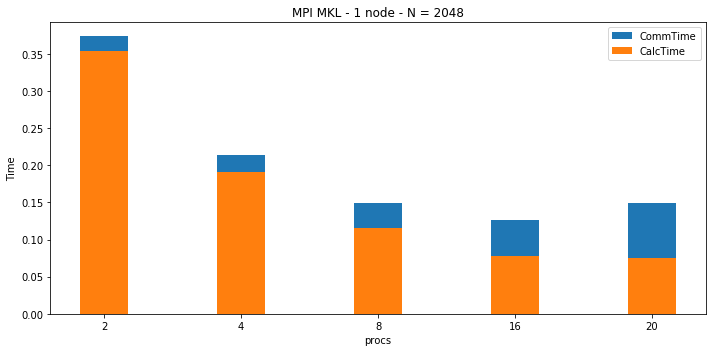

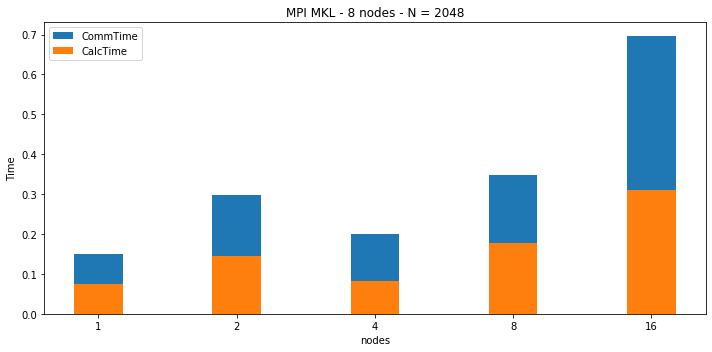

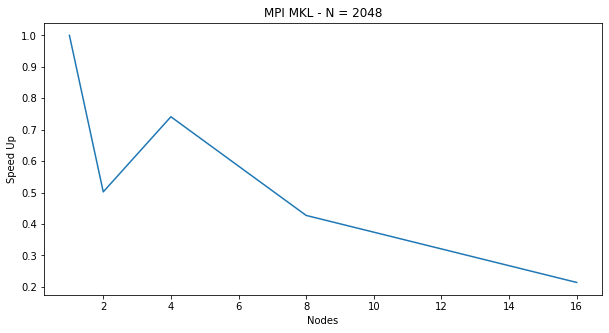

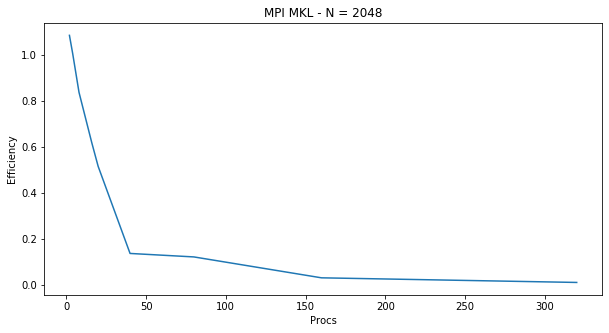

In [43]:
procs, tot_time, calc_time, comm_time = read_all_times(mkl_path+"/2048")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI MKL - 1 node - N = 2048", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI MKL - 8 nodes - N = 2048", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI MKL - N = 2048", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI MKL - N = 2048", calc_time, np.asarray(procs), 2048)

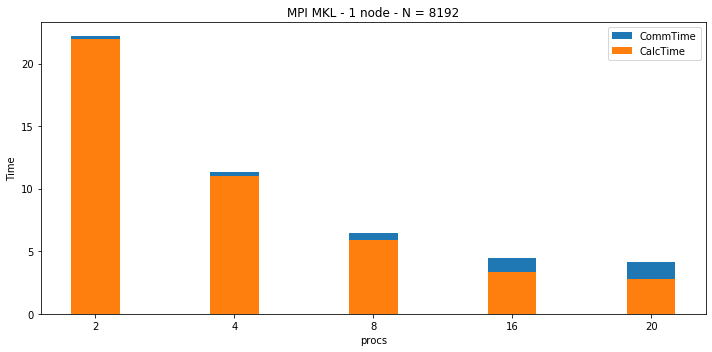

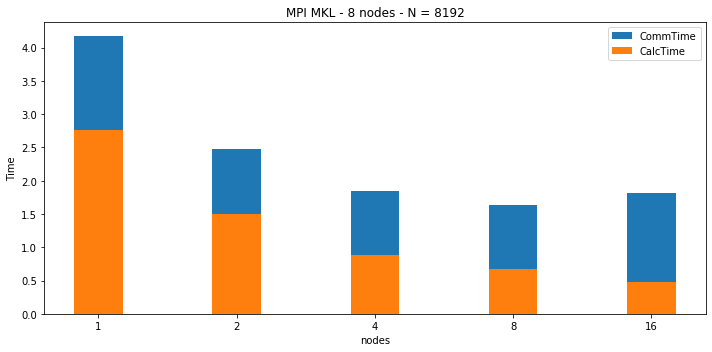

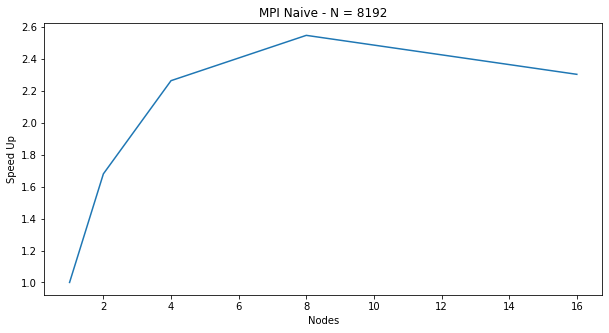

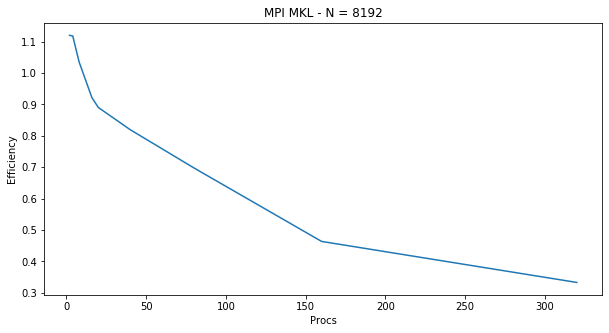

In [44]:
procs, tot_time, calc_time, comm_time = read_all_times(mkl_path+"/8192")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI MKL - 1 node - N = 8192", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI MKL - 8 nodes - N = 8192", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI Naive - N = 8192", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI MKL - N = 8192", calc_time, np.asarray(procs), 8192)

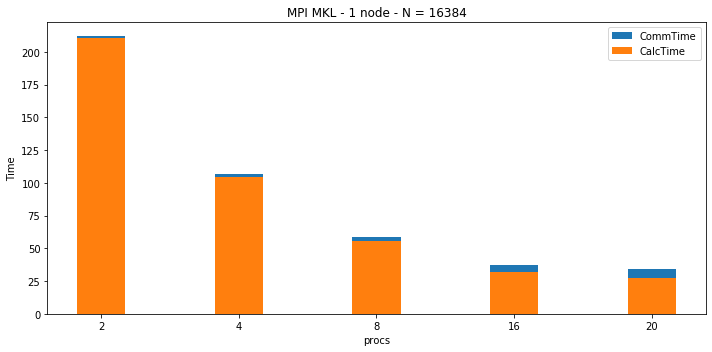

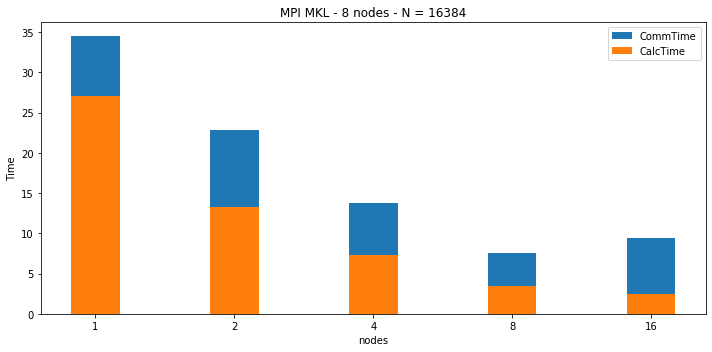

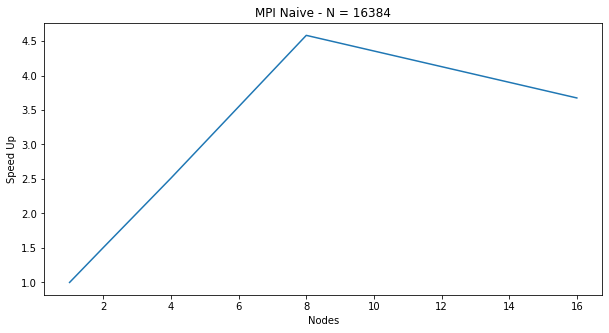

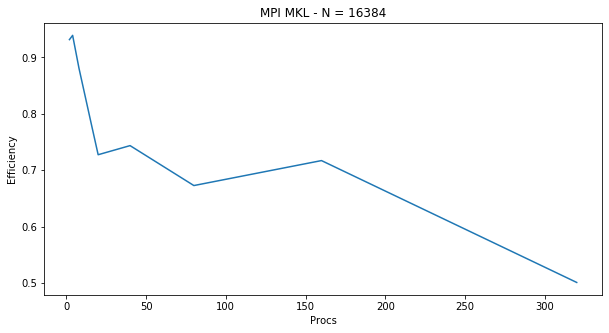

In [45]:
procs, tot_time, calc_time, comm_time = read_all_times(mkl_path+"/16384")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI MKL - 1 node - N = 16384", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI MKL - 8 nodes - N = 16384", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI Naive - N = 16384", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI MKL - N = 16384", calc_time, np.asarray(procs), 16384)

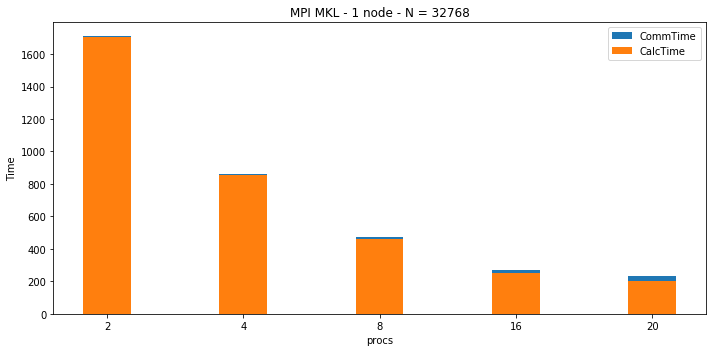

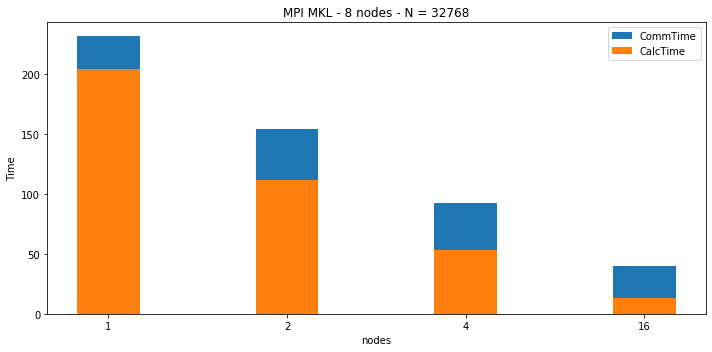

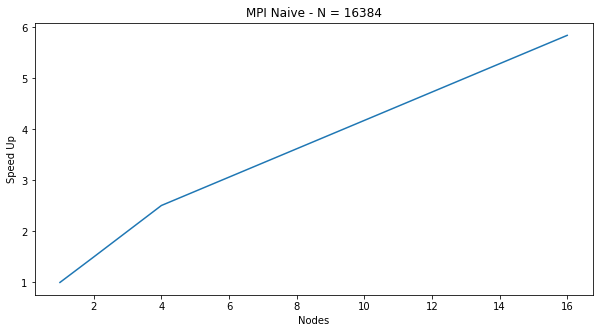

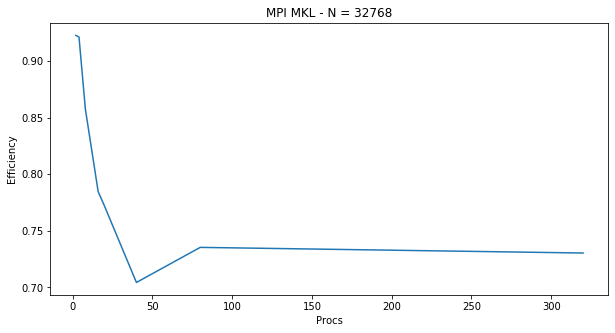

In [46]:
procs, tot_time, calc_time, comm_time = read_all_times(mkl_path+"/32768")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
make_plots_times("MPI MKL - 1 node - N = 32768", procs[0:5], 'procs', comm_time[0:5], calc_time[0:5])
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI MKL - 8 nodes - N = 32768", nodes[4:], 'nodes', comm_time[4:], calc_time[4:])
scaling("MPI Naive - N = 16384", np.asarray(nodes[4:]), tot_time[4:])
efficiency("MPI MKL - N = 32768", calc_time, np.asarray(procs), 32768)

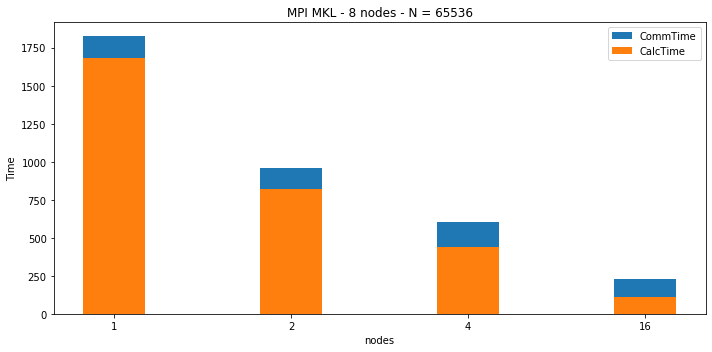

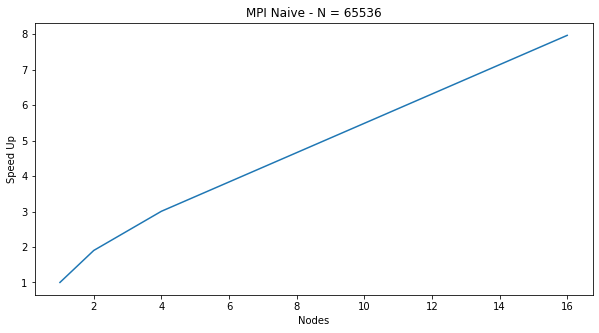

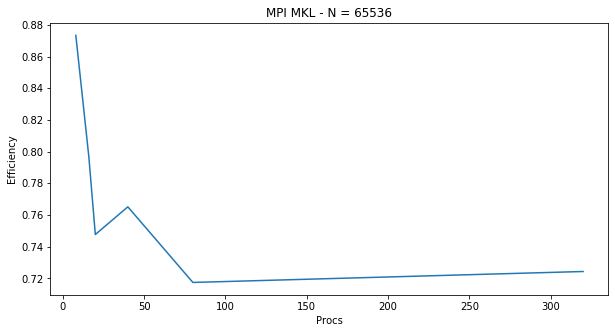

In [47]:
procs, tot_time, calc_time, comm_time = read_all_times(mkl_path+"/65536")
tot_time = np.asarray(tot_time)
calc_time = np.asarray(calc_time)
comm_time = np.asarray(comm_time)
nodes = [(int)(p/20) for p in procs]
make_plots_times("MPI MKL - 8 nodes - N = 65536", nodes[2:], 'nodes', comm_time[2:], calc_time[2:])
scaling("MPI Naive - N = 65536", np.asarray(nodes[2:]), tot_time[2:])
efficiency("MPI MKL - N = 65536", calc_time, np.asarray(procs), 65536)